In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np

def get_exact_samples(desired_mean, desired_std_dev) :
    num_samples = 2
    samples = np.random.normal(loc=0.0, scale=desired_std_dev, size=num_samples)

    actual_mean = np.mean(samples)
    actual_std = np.std(samples)

    zero_mean_samples = samples - (actual_mean)

    zero_mean_mean = np.mean(zero_mean_samples)
    zero_mean_std = np.std(zero_mean_samples)

    scaled_samples = zero_mean_samples * (desired_std_dev/zero_mean_std)
    scaled_mean = np.mean(scaled_samples)
    scaled_std = np.std(scaled_samples)

    final_samples = scaled_samples + desired_mean
    final_mean = np.mean(final_samples)
    final_std = np.std(final_samples)
#     print("Final samples stats     : mean = {:.4f} stdv = {:.4f}".format(final_mean - desired_mean, final_std - desired_std_dev))
    return final_samples

In [3]:
from Trainers.DatasetBC import *
from ExperimentsBC import *
from common_code.plotting import *

In [4]:
dataset_names = {
    'sst' : 'SST',
    'imdb' : 'IMDB',
    'agnews' : 'AG News',
    'tweet' : 'ADR',
    'snli' : 'SNLI',
    '20News_sports' : '20 News Sports',
    'diab' : 'Diabetes',
    'cnn' : 'CNN',
    'anemia' : 'Anemia',
    'babi_1' : 'bAbI 1',
    'babi_2' : 'bAbI 2',
    'babi_3' : 'bAbI 3'
}  

dataset_order = list(map(lambda x : dataset_names[x], 
                      ['sst', 'imdb', 'tweet', 'agnews', '20News_sports', 
                       'diab', 'anemia', 'cnn', 'babi_1', 'babi_2', 'babi_3', 'snli']))

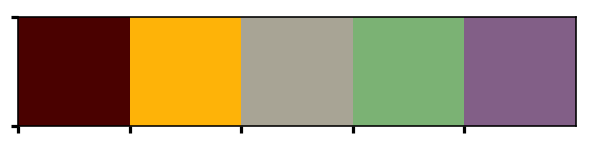

In [5]:
colors = ["mahogany", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))
sns.set_palette(sns.xkcd_palette(colors))

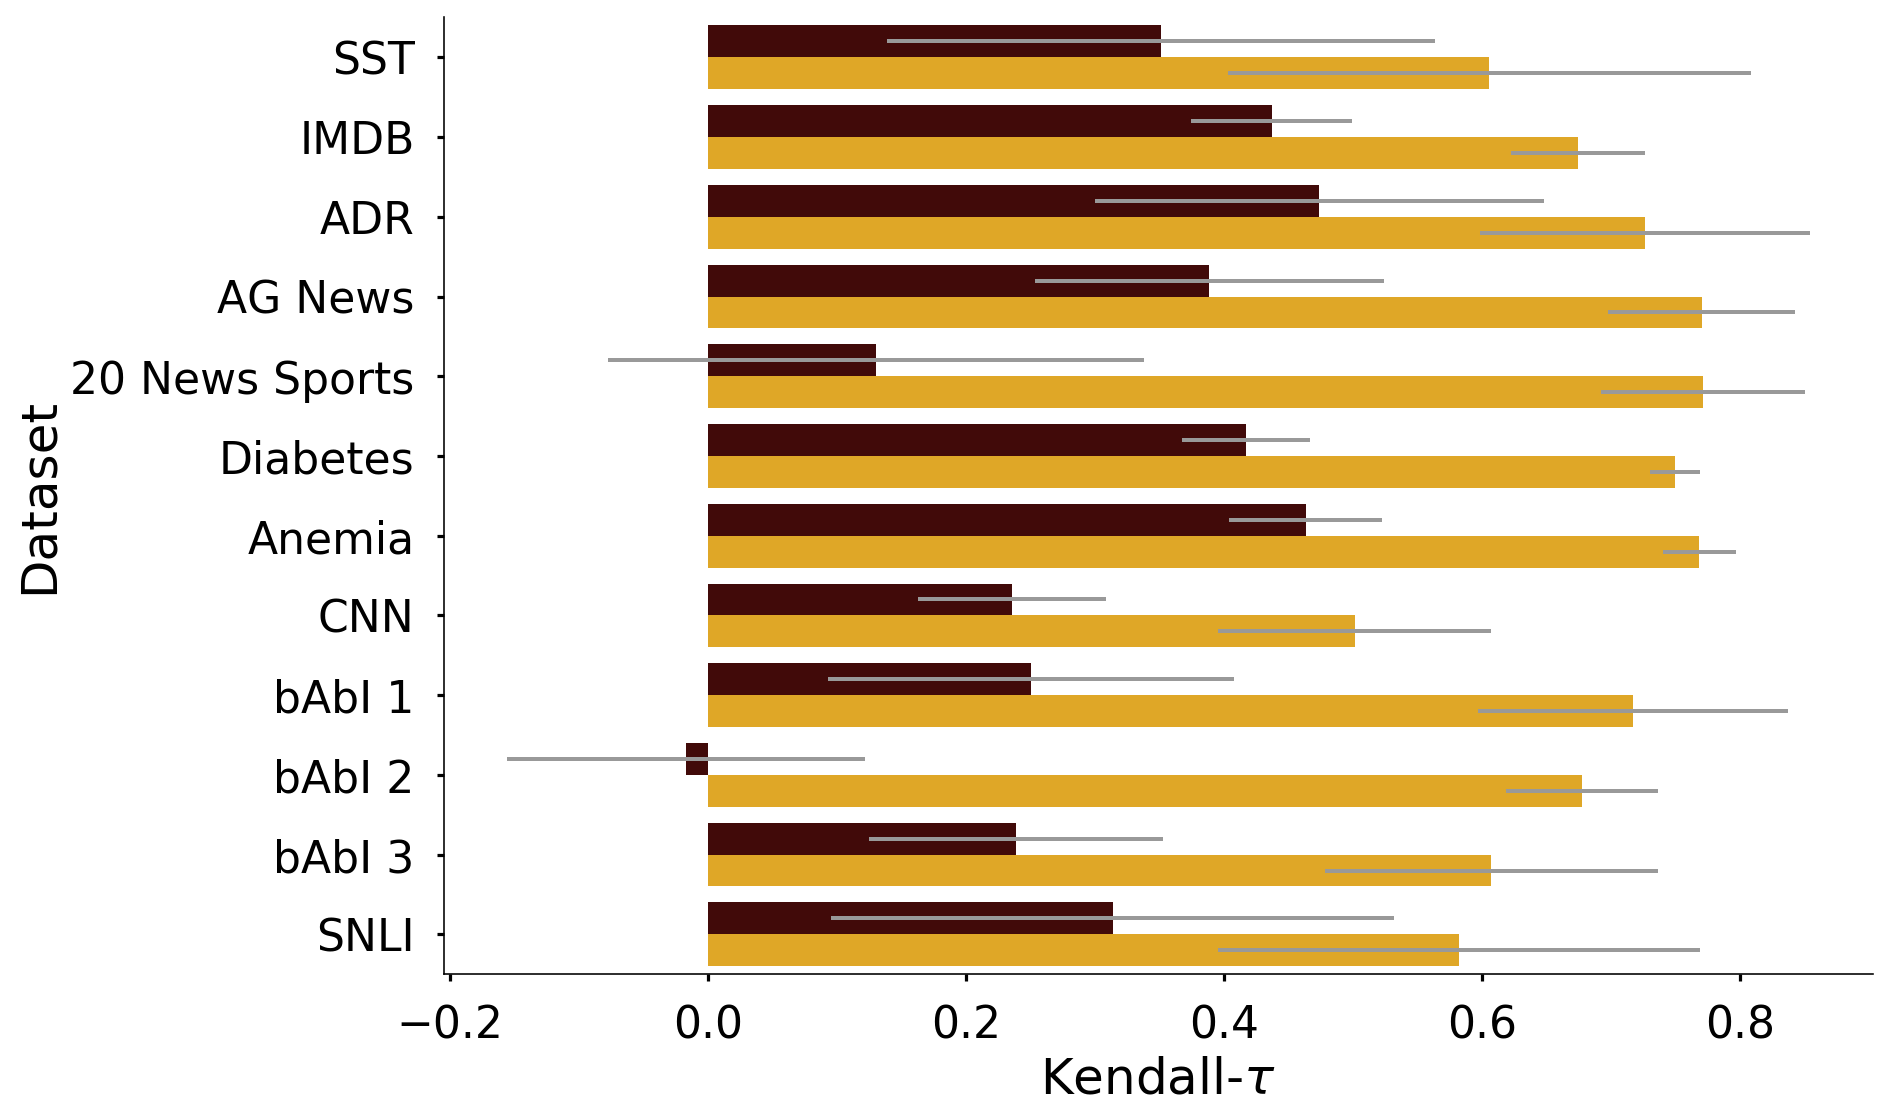

In [6]:
model = 'lstm+tanh'
model_1 = 'average+tanh'
import os
models = [x for x in os.listdir('graph_outputs/GradientPval_kendalltau/') if model in x]
import pandas as pd
dfs = []
for d in models :
    df = pd.read_csv('graph_outputs/GradientPval_kendalltau/' + d, index_col=0)
    df['Model'] = 'lstm'
    x = d.split('+')[0]
    df_1 = pd.read_csv('graph_outputs/GradientPval_kendalltau/' + x + '+' + model_1 + '.csv', index_col=0)
    df_1['Model'] = 'average'
    if x in dataset_names :
        df['dataset'] = x
        df_1['dataset'] = x
        data_1 = get_exact_samples(df.loc['Overall']['mean'], df.loc['Overall']['std'])
        for s in data_1 :
            dfs.append({'dataset' : x, 'Model' : 'lstm', 'val' : s})
        data_1 = get_exact_samples(df_1.loc['Overall']['mean'], df_1.loc['Overall']['std'])
        for s in data_1 :
            dfs.append({'dataset' : x, 'Model' : 'average', 'val' : s})

import seaborn as sns
dfs = pd.DataFrame(dfs)
dfs['dataset'] = dfs.dataset.apply(lambda x : dataset_names[x])
fig = sns.barplot(y='dataset', x='val', order=dataset_order, hue='Model', data=dfs, ci='sd', errwidth=2, errcolor='#999999')
xmin, xmax = fig.axes.get_ylim()
# fig.axes.vlines(dfs['val'].mean(), xmin, xmax, colors='#222222')
sns.despine()
plt.xlabel("Kendall-$\\tau$", fontsize=25)
plt.ylabel("Dataset", fontsize=25)
plt.ylim(xmin, xmax)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
fig.axes.get_legend().remove()
# plt.gcf().set_size_inches(15, 15)
plt.savefig('GRes.svg', bbox_inches='tight', pad_inches=0)

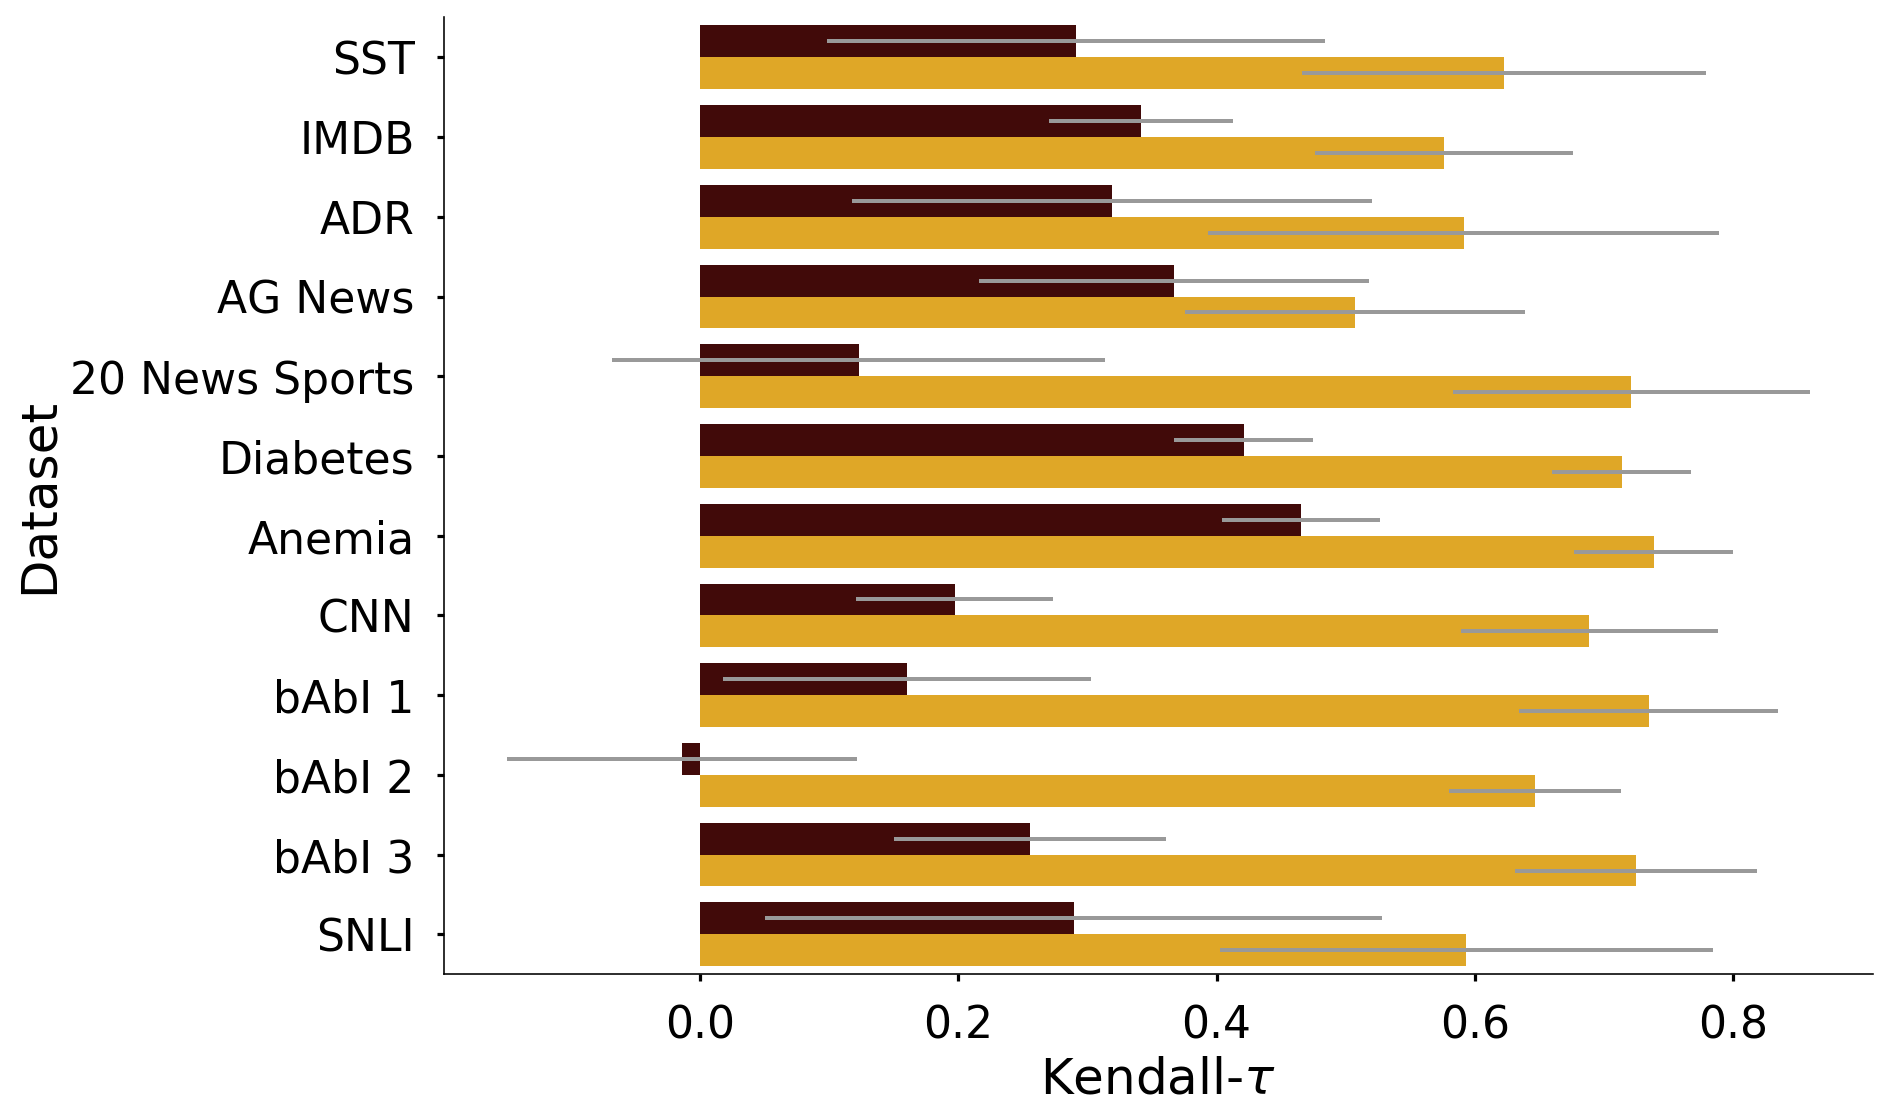

In [7]:
model = 'lstm+tanh'
model_1 = 'average+tanh'
import os
dirname = 'graph_outputs/pyxc-pyc_pval_kendalltau/'
models = [x for x in os.listdir(dirname) if model in x]
import pandas as pd
dfs = []
for d in models :
    df = pd.read_csv(dirname + d, index_col=0)
    df['Model'] = 'lstm'
    x = d.split('+')[0]
    df_1 = pd.read_csv(dirname + x + '+' + model_1 + '.csv', index_col=0)
    df_1['Model'] = 'average'
    if x in dataset_names :
        df['dataset'] = x
        df_1['dataset'] = x
        data_1 = get_exact_samples(df.loc['Overall']['mean'], df.loc['Overall']['std'])
        for s in data_1 :
            dfs.append({'dataset' : x, 'Model' : 'lstm', 'val' : s})
        data_1 = get_exact_samples(df_1.loc['Overall']['mean'], df_1.loc['Overall']['std'])
        for s in data_1 :
            dfs.append({'dataset' : x, 'Model' : 'average', 'val' : s})

import seaborn as sns
dfs = pd.DataFrame(dfs)
dfs['dataset'] = dfs.dataset.apply(lambda x : dataset_names[x])
fig = sns.barplot(y='dataset', x='val', order=dataset_order, hue='Model', data=dfs, ci='sd', errwidth=2, errcolor='#999999')
xmin, xmax = fig.axes.get_ylim()
# fig.axes.vlines(dfs['val'].mean(), xmin, xmax, colors='#222222')
sns.despine()
plt.xlabel("Kendall-$\\tau$", fontsize=25)
plt.ylabel("Dataset", fontsize=25)
plt.ylim(xmin, xmax)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
fig.axes.get_legend().remove()
# plt.gcf().set_size_inches(15, 15)
# plt.savefig('graph_outputs/CorrGL-AG_summary.pdf', bbox_inches='tight', pad_inches=0)
plt.savefig('LRes.svg', bbox_inches='tight', pad_inches=0)

In [ ]:
model = 'lstm+tanh'
import os
models = [x for x in os.listdir('graph_outputs/CorrGL-AG_kendalltau/') if model in x]
import pandas as pd
dfs = {}
for d in models :
    df = pd.read_csv('graph_outputs/CorrGL-AG_kendalltau/' + d, index_col=0)
    dfs[d.split('+')[0]] = df.loc['Overall']

import seaborn as sns
dfs = pd.DataFrame(dfs).transpose()
dfs.index = dfs.index.map(lambda x : dataset_names[x])
fig = sns.barplot(y=dfs.index, x=dfs['mean'], order=dataset_order)

xmin, xmax = fig.axes.get_ylim()
fig.axes.vlines(dfs['mean'].mean(), xmin, xmax, colors='#222222')
sns.despine()
plt.xlabel("Mean Difference between Correlations", fontsize=25)
plt.ylabel("Dataset", fontsize=25)
plt.ylim(xmin, xmax)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
# plt.gcf().set_size_inches(15, 15)
plt.savefig('graph_outputs/CorrGL-AG_summary.pdf', bbox_inches='tight', pad_inches=0)

In [ ]:
import os
models = [x for x in os.listdir('graph_outputs/CorrStats_kendalltau/') if 'lstm+tanh' in x]
models_avg = [x for x in os.listdir('graph_outputs/CorrStats_kendalltau/') if 'average+tanh' in x]

import pandas as pd
dfs = {}
for d, d1 in zip(models, models_avg) :
    df = pd.read_csv('graph_outputs/CorrStats_kendalltau/' + d, index_col=0).rename(columns=lambda x : x + '_lstm')
    df_1 = pd.read_csv('graph_outputs/CorrStats_kendalltau/' + d1, index_col=0).rename(columns=lambda x : x + '_avg')
    df = pd.concat([df, df_1], axis=1)
    dfs[d.split('+')[0]] = df.loc['ag']

import seaborn as sns
dfs = pd.DataFrame(dfs).transpose()
dfs.index = dfs.index.map(lambda x : dataset_names[x])
fig = sns.barplot(y=dfs.index, x=dfs['mean_avg'] - dfs['mean_lstm'], order=dataset_order)

xmin, xmax = fig.axes.get_ylim()
fig.axes.vlines((dfs['mean_avg'] - dfs['mean_lstm']).mean(), xmin + 0.5, xmax - 0.5, colors='#222222')
sns.despine()
plt.xlabel("Mean Difference between Correlations", fontsize=25)
plt.ylabel("Dataset", fontsize=25)
plt.ylim(xmin, xmax)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
# plt.savefig('graph_outputs/CorrAL(avg-lstm)_summary.pdf', bbox_inches='tight')
plt.show()

In [ ]:
from Trainers.DatasetQA import *
from ExperimentsQA import *

In [ ]:
for k in datasets :
    print(k)
    dataset = datasets[k]()
    dataset.basepath = 'outputs_dev'
    generate_graphs_on_encoders(dataset, ['cnn', 'lstm', 'average', 'cnn_dot', 'lstm_dot', 'average_dot'])
    print('+'*700)

In [ ]:
dataset = datasets_ehr['mortality']()

In [ ]:
from Trainers.PlottingBC import *

In [ ]:
evaluator = run_evaluator_on_latest_model(dataset, config='lstm')
logodds_results = pload(evaluator.model, 'logodds_attention')
emax_jds, emax_adv_attn, emax_ad_y = plot_attn_diff(dataset, dataset.test_data, logodds_results, 
                                                    save_name='logodds_subs', dirname=evaluator.model.dirname)

In [ ]:
n = 308
a = print_adversarial_example(dataset.vec.map2words(dataset.test_data.X[n]), dataset.test_data.attn_hat[n], emax_adv_attn[n], latex=True)
dataset.test_data.yt_hat[n], emax_ad_y[n]
print(a[2])

In [ ]:
ent = [np.max(x) for x in emax_adv_attn]
plt.scatter(ent, emax_jds)

In [ ]:
idx_1 = set(np.where(np.array(ent) > 0.6)[0]) & set(np.where(np.array(emax_jds) > 0.4)[0])
idx_1

In [ ]:
train_dataset(dataset, 'logodds_lstm_reg')

In [ ]:
run_logodds_experiment(dataset, 'logodds_lstm_reg')

In [ ]:
run_experiments_on_latest_model(dataset, 'logodds_lstm_reg')

In [ ]:
generate_graphs_on_latest_model(dataset, 'logodds_lstm_reg')

In [ ]:
run_logodds_substitution_experiment(dataset)

In [ ]:
test_data = dataset.test_data
plt.scatter(test_data.yt_hat[:, 0], test_data.opp_yt_hat[:, 0], s=5)
plt.show()

In [ ]:
diff = np.abs(test_data.yt_hat[:, 0] - test_data.opp_yt_hat[:, 0])
np.argsort(diff)[:15]

In [ ]:
plt.hist(diff, bins=30)

In [ ]:
test_data = dataset.test_data
for k, v in test_data.logodds_combined[0].items() :
    print(dataset.vec.map2words(v))

In [ ]:
n = 4231
true_X = dataset.vec.map2words(test_data.X[n])
new_X = dataset.vec.map2words(test_data.opp_X[n])
print_attn(true_X, dataset.test_data.attn_hat[n])
print(test_data.yt_hat[n])
print_attn(new_X, dataset.test_data.opp_attn[n])
print(test_data.opp_yt_hat[n])

In [ ]:
for k in datasets_ehr :
    dataset = datasets_ehr[k]()
    generate_graphs_on_latest_model(dataset)

In [ ]:
for k in datasets_ehr :
    dataset = datasets_ehr[k]()

In [ ]:
for k in datasets_ehr :
    dataset = datasets_ehr[k]()
    train_dataset(dataset, 'logodds_lstm')

In [ ]:
for k in datasets_ehr :
    dataset = datasets_ehr[k]()
    run_evaluator_on_latest_model(dataset, 'logodds_lstm')

In [ ]:
from model.LR import LR

In [ ]:
for k in datasets_ehr :
    if k != 'pheno' : continue
    dataset = datasets_ehr[k]()
    train_lr_on_dataset(dataset)

In [ ]:
for k in datasets_ehr :
    dataset = datasets_ehr[k]()
    push_all_models(dataset, dataset.keys_to_use)

In [ ]:
for k in datasets_ehr :
    dataset = datasets_ehr[k]()
    run_logodds_experiment(dataset)

In [ ]:
list(enumerate(dataset.vec.label_headers))

In [ ]:
get_top_words(dataset, config='lstm')

In [ ]:
y = np.array(dataset.test_data.yt_hat)
idx_y = np.where(y > 0.8)[0]

In [ ]:
from collections import defaultdict
top_words_dict = defaultdict(float)
for i in idx_y :
    d = dataset.test_data.top_words_attn[i]
    for k, v in d.items() :
        top_words_dict[k] += v

In [ ]:
top_words = dict(sorted(top_words_dict.items(), key=lambda x: x[1])[-20:])

In [ ]:
top_words

In [ ]:
lr.print_all_features(n=40)

In [ ]:
top_words_attn = set(top_words.keys())
top_words_lr = set(lr.get_features(n=20))

In [ ]:
top_words_attn & top_words_lr

In [ ]:
len(top_words_attn & top_words_lr) / len(top_words_attn | top_words_lr)

In [ ]:
dataset.keys_to_use

Multi Adversarial Examples
==========================

In [ ]:
for k in datasets_ehr :
    dataset = datasets_ehr[k]()
#     generate_adversarial_examples(dataset, config='lstm')
#     generate_logodds_examples(dataset, config='lstm')
#     generate_graphs_on_latest_model(dataset, config='lstm')
    push_all_models(dataset, keys=dataset.keys_to_use)

In [ ]:
dataset.vec.label_headers

In [ ]:
for k in datasets_ehr :
    dataset = datasets_ehr[k]()
    dataset.display_stats()

In [ ]:
len(dataset.test_data.X)

In [ ]:
evaluator = run_evaluator_on_latest_model(dataset)

In [ ]:
multi_adversarial_outputs = pload(evaluator.model, 'multi_adversarial')

In [ ]:
from Trainers.PlottingBC import *
test_data = dataset.test_data
emax_jds, emax_adv_attn, emax_ad_y = plot_multi_adversarial(test_data.X, test_data.yt_hat, 
                                                            test_data.attn_hat, multi_adversarial_outputs, dirname=".")

In [ ]:
print_adversarial_examples(dataset, test_data.X, test_data.yt_hat, test_data.attn_hat, 
                           emax_jds, emax_adv_attn, emax_ad_y, by_class=None, dirname='.')